In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import os

In [2]:
# Get the current working directory
orig_working_directory = os.getcwd()
print(orig_working_directory)

/Users/Taslemun/Desktop/Cryptocurrency Tweets


In [3]:
# In this case, we are changing it to six levels up
os.chdir(os.path.join('..','..','..','..','..','..'))

In [4]:
# Now, you can see the new working directory
curr_working_directory = os.getcwd()
os.getcwd()

'/'

In [5]:
# This will search for the config file in the working directory
# Be sure that your config file is in your root repo folder

from config import consumer_key, consumer_secret, access_token, access_token_secret

In [6]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
api = tweepy.API(auth)

In [7]:
# Target User Account
user_account = "WhalePanda"

In [8]:
tweets = []

tweet_id = []
created_at = []
favorite_count = []
full_text = []
entities = []

In [9]:
# Iterate through the first 500 tweets
for tweet in tweepy.Cursor(api.user_timeline, 'WhalePanda', tweet_mode='extended').items(1000):
    tweets.append(tweet)

In [10]:
# Preview the tweets list
#tweets

In [11]:
# Loop through Tweets list and process data 
for t in tweets:
    tweet_id.append(t.id)
    created_at.append(t.created_at)
    favorite_count.append(t.favorite_count)
    full_text.append(t.full_text)
    entities.append(t.entities)

In [12]:
# Build a tweets DataFrame

tweets_df = pd.DataFrame({
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Favorite Count': favorite_count,
    'Tweet Text': full_text    
    })

In [13]:
len(tweets_df)

1000

In [14]:
# set DataFrame to not truncate
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

<ipython-input-14-87a0d77213bf>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [15]:
tweets_df.head()

,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,1365362643280740355,2021-02-26 18:06:36,49,@IamNomad @CryptoCobain only if they were on a secret mission.
1,1365358411018305536,2021-02-26 17:49:46,56,@CryptoCobain Who is Rambo Musk?
2,1365303148114546689,2021-02-26 14:10:11,127,"""I am shutting you down! You are no longer allowed to operate here!""\n""Cool but we actually blocked NY citizens years ago.""\n""It doesn't matter! I rule that you're no longer allowed to provide your services to our citizens.""\n""Whatevs""\nhttps://t.co/kQTnBcOWVt"
3,1365280518879723525,2021-02-26 12:40:16,0,"RT @hodlhodl: Some great lending offers with 18-20% APR, find more at https://t.co/4w4U9NAx8S https://t.co/C9Kiqh6EFK"
4,1365035878675021833,2021-02-25 20:28:09,75,"Sure, why not?\nhttps://t.co/JyBuN8y9lK"


In [16]:
tweets_df

,Tweet ID,Tweet Time,Favorite Count,Tweet Text
0,1365362643280740355,2021-02-26 18:06:36,49,@IamNomad @CryptoCobain only if they were on a secret mission.
1,1365358411018305536,2021-02-26 17:49:46,56,@CryptoCobain Who is Rambo Musk?
2,1365303148114546689,2021-02-26 14:10:11,127,"""I am shutting you down! You are no longer allowed to operate here!""\n""Cool but we actually blocked NY citizens years ago.""\n""It doesn't matter! I rule that you're no longer allowed to provide your services to our citizens.""\n""Whatevs""\nhttps://t.co/kQTnBcOWVt"
3,1365280518879723525,2021-02-26 12:40:16,0,"RT @hodlhodl: Some great lending offers with 18-20% APR, find more at https://t.co/4w4U9NAx8S https://t.co/C9Kiqh6EFK"
4,1365035878675021833,2021-02-25 20:28:09,75,"Sure, why not?\nhttps://t.co/JyBuN8y9lK"
...,...,...,...,...
995,1315969650799370249,2020-10-13 10:56:28,76,Good luck with that.\nhttps://t.co/u0bXHyugkm
996,1315619818477944835,2020-10-12 11:46:22,0,"@carribeanpeanut Actually the best explanation so far that I've heard is that a lot of those smaller villages have kids that study in Brussels and even though they get it in Brussels, it still counts as an infection in the city where they live."
997,1315619388905717765,2020-10-12 11:44:39,0,"@carribeanpeanut I find the information interesting. There are more infections in the French speaking areas in Canada &amp; Switzerland as well compared to the rest of those countries.\nDon't you find it interesting? I'm not nationalistic Flemish guy. If it were up to me, I would live somewhere else😅"
998,1315615859730153475,2020-10-12 11:30:38,2,@eumartinez20 @CarstenBKK Yes and I would never promote nationalism. I don't like Belgium. The only reason I'm still living here is so that my kids could be close to their grandparents.\nI genuinely find it interesting since they're seeing the same in French speaking Canada and French speaking Switzerland.


In [17]:
#tweets_df.to_excel('bowser_tweets.xlsx')
#entities

In [18]:
hashtag_entries = [e['hashtags'] for e in entities]
hashtag_entries

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'text': 'Bitcoin', 'indices': [80, 88]}],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'text': 'Bitcoin', 'indices': [40, 48]}],
 [],
 [],
 [],
 [],
 [],
 [{'text': 'Bitcoin', 'indices': [111, 119]}],
 [],
 [{'text': 'Bitcoin', 'indices': [50, 58]}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'text': 'Bitcoin', 'indices': [14, 22]}],
 [{'text': 'Bitcoin', 'indices': [225, 233]}],
 [],
 [],
 [],
 [],
 [],
 [{'text': 'btc', 'indices': [31, 35]},
  {'text': 'cryptocurrencies', 'indices': [116, 133]}],
 [{'text': 'Bitcoin', 'indices': [29, 37]}],
 [{'text': 'Bitcoin', 'indices': [34, 42]}],
 [],
 [{'text': 'Bitcoin', 'indices': [72, 80]}],
 [],
 [{'text': 'Bitcoin', 'indices': [77, 85]}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'text': 'Bitcoin', 'indices': [24, 32]}],
 [{'text': 'Bitcoin', 'indices': [58, 66

In [19]:
hashtags = []

for h in hashtag_entries:
    for t in h:
        hashtags.append(t['text'])
        
hashtags

['Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'btc',
 'cryptocurrencies',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'silver',
 'Bitcoin',
 'silvershortsqueeze',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'DeFi',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Bi

In [20]:
hashtag_entries

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'text': 'Bitcoin', 'indices': [80, 88]}],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'text': 'Bitcoin', 'indices': [40, 48]}],
 [],
 [],
 [],
 [],
 [],
 [{'text': 'Bitcoin', 'indices': [111, 119]}],
 [],
 [{'text': 'Bitcoin', 'indices': [50, 58]}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'text': 'Bitcoin', 'indices': [14, 22]}],
 [{'text': 'Bitcoin', 'indices': [225, 233]}],
 [],
 [],
 [],
 [],
 [],
 [{'text': 'btc', 'indices': [31, 35]},
  {'text': 'cryptocurrencies', 'indices': [116, 133]}],
 [{'text': 'Bitcoin', 'indices': [29, 37]}],
 [{'text': 'Bitcoin', 'indices': [34, 42]}],
 [],
 [{'text': 'Bitcoin', 'indices': [72, 80]}],
 [],
 [{'text': 'Bitcoin', 'indices': [77, 85]}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'text': 'Bitcoin', 'indices': [24, 32]}],
 [{'text': 'Bitcoin', 'indices': [58, 66

In [21]:
hashtags_series = pd.Series(hashtags)

In [22]:
tweet_counts = hashtags_series.value_counts()
tweet_counts

Bitcoin               146
bitcoin               2  
silver                1  
cryptocurrencies      1  
XRPTheSecurity        1  
Tether                1  
silvershortsqueeze    1  
btc                   1  
DeFi                  1  
dtype: int64

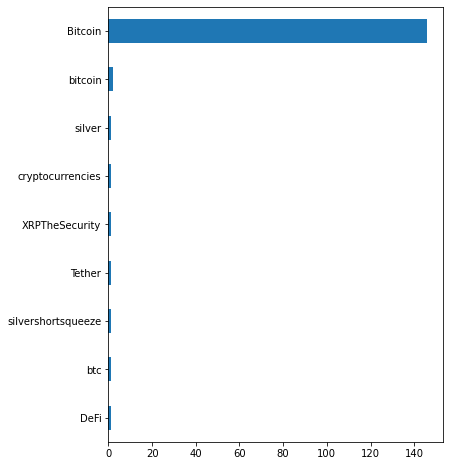

In [23]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(6, 8))

tweet_plot = tweet_counts.plot(kind='barh')
tweet_plot.invert_yaxis()

In [24]:
tweet_counts.sum()

155